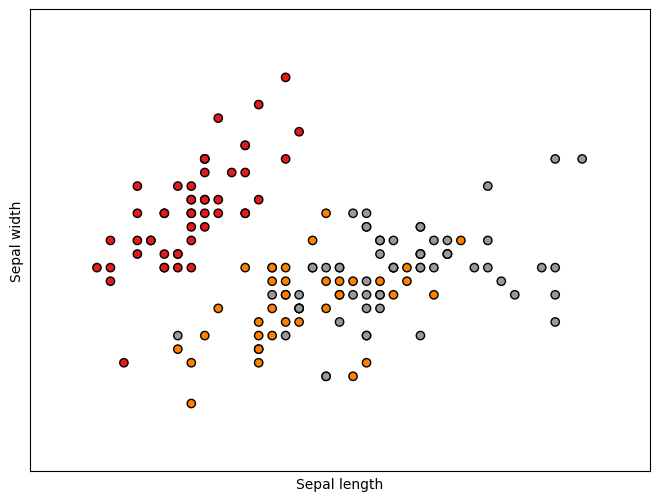

In [54]:
# Modified version of the code at: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

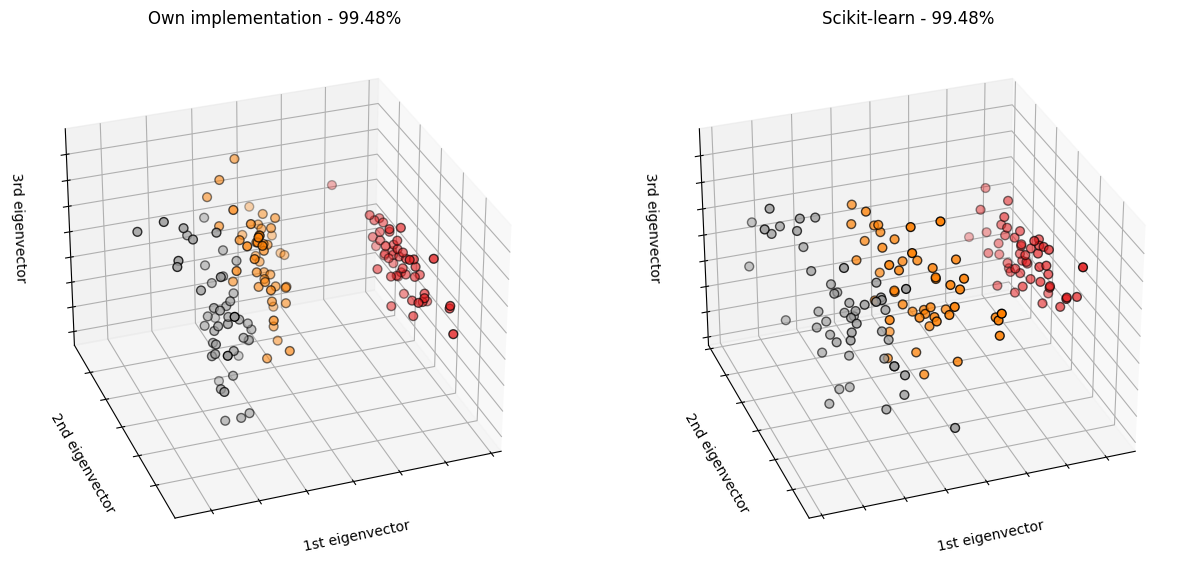

In [60]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(15, 12))
ax1 = fig.add_subplot(121, projection="3d", elev=-150, azim=110)
ax2 = fig.add_subplot(122, projection="3d", elev=-150, azim=110)

from pca import PrincipalComponentAnalysis
own_pca = PrincipalComponentAnalysis()
X_reduced_own, captured_variance_own = own_pca.reduce(iris.data, 3)

from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=3)
X_reduced_sklearn = sklearn_pca.fit_transform(iris.data)
explained_variance_sklearn = sklearn_pca.explained_variance_ratio_.sum()


def plot_reduced_data(ax, X_reduced, title):
    ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        X_reduced[:, 2],
        c=y,
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=40,
    )

    ax.set_title(title)
    ax.set_xlabel("1st eigenvector")
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.zaxis.set_ticklabels([])

plot_reduced_data(ax1, X_reduced_own, f'Own implementation - {(captured_variance_own*100):0.2f}%')
plot_reduced_data(ax2, X_reduced_sklearn, f'Scikit-learn - {(explained_variance_sklearn*100):0.2f}%')
plt.show()